In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import os

In [2]:
chap = os.listdir("./First Paragon/")
chap

['Chapter 1.txt',
 'Chapter 2.txt',
 'Chapter 3.txt',
 'Chapter 4.txt',
 'Chapter 5.txt',
 'Chapter 6.txt',
 'First Paragon.txt',
 'Prologue.txt']

In [3]:
data = {}
for i,c in enumerate (chap):
    f =  open("./First Paragon/" + c, "r", encoding="utf8")  
    data[c] = f.read()
data.keys()

dict_keys(['Chapter 1.txt', 'Chapter 2.txt', 'Chapter 3.txt', 'Chapter 4.txt', 'Chapter 5.txt', 'Chapter 6.txt', 'First Paragon.txt', 'Prologue.txt'])

In [4]:
data["Prologue.txt"]

'Prologue\n \n\n \n\nXi Cerberi System, low orbit over Xi Cerberi Prime. \n\n \n\nGalen Kiani hunched over and stared at his unshaven face in the cracked mirror. The blue neon spotlight didn’t do him any favors. Not that it mattered. After readying himself for a new day, he emerged from his cramped quarters aboard the starbase Vigil-17. An upright cylindrical platform, with a series of outward-facing antennae, and weapons bay at the bottom, Vigil-17 was one of twenty stations constructed by the old Galactic Alliance, arranged in a ring around the planet Xi Cerberi Prime. \n\nAs lights turned on around him, Galen paced lazily down the corridor toward the mess hall. He’d need his dose of caffeine before anything else. He glanced at the reinforced windows lining the corridor. An endless void and his blurred reflection looked back. \n\n“Here’s looking at you, boss,” he said, winking at himself. \n\nAs he approached the mess hall, a large pair of doors hissed and opened to the sounds of sev

In [5]:
pd.set_option('max_colwidth',200)
df1 = pd.DataFrame.from_dict(data, orient = 'index')
df1 = df1.reset_index()
df1.columns = ['Chapters', 'Content']
df1

,Chapters,Content
0,Chapter 1.txt,Do you remember Earth? We’d lie on the grassy knoll and listen to the glidecraft harvesters before heading home for the day. We’d track mud into the lounge. Dad would wag his finger at us. Mom wou...
1,Chapter 2.txt,"Makeda I\n \n\n \n\nDrakhua System, Drakhua II – Altaran Alliance mining colony. \n\n \n\nA raindrop splashed over Makeda’s forehead. She kept her eyes shut, letting the cold droplet travel down h..."
2,Chapter 3.txt,"Varuden I\n \n\n \n\nDraconis System, outer space. \n\n \n\nVaruden Kerensky floated in the void. The silence and emptiness of space relaxed his senses. The constant exertion to resist the vacuum ..."
3,Chapter 4.txt,"Makeda II\n \n\n \n\n“Who the hell’s this, eh?” Hylgritt asked, stepping into the stranger’s personal space, her right hand hovering over her knife. \n\n“I am your ride, my dear girl,” the man rep..."
4,Chapter 5.txt,"Logan II\n \n\n \n\nWe did our best, Jace. We made a difference. When we all came together and pushed as one, I like to think it mattered. I have to. \n\nThe Seraphim. The cause. Their prophecies...."
5,Chapter 6.txt,"Varuden II\n \n\n \n\nThe Samael’s Edge II was the flagship of the Preliator, the Stellar Zenith’s military caste. At five kilometers in length, it was as beautiful as it was massive. Nearly twice..."
6,First Paragon.txt,"\n\nThe First Paragon\n\nBook 1 of the Ascendant Saga\n\n \n\nCristian Scubli\n\n \n\n \n\n \n\nAll characters and events in this publication, other than those clearly in the public domain, are f..."
7,Prologue.txt,"Prologue\n \n\n \n\nXi Cerberi System, low orbit over Xi Cerberi Prime. \n\n \n\nGalen Kiani hunched over and stared at his unshaven face in the cracked mirror. The blue neon spotlight didn’t do h..."


In [6]:
import re
import string

def round1(text):
    #lower the Text
    text = text.lower()
    # Remove Numbers 
    text = re.sub(r"\d+", "", text)
    # Remove Symbols and special characters
    # ^\w return true if not alphanumereic 
    text = re.sub(r'[^\w]', ' ', text)
    # Remove more than a single whitespace 
    text = ' '.join(text.split())
    # Remove Leading and Trailing Whitespaces
    text = text.strip()
    return text
rnd1 = lambda x: round1(x)

In [7]:
df2 = df1.copy()
df2['Content'] = df2['Content'].apply(rnd1)
df2

,Chapters,Content
0,Chapter 1.txt,do you remember earth we d lie on the grassy knoll and listen to the glidecraft harvesters before heading home for the day we d track mud into the lounge dad would wag his finger at us mom would l...
1,Chapter 2.txt,makeda i drakhua system drakhua ii altaran alliance mining colony a raindrop splashed over makeda s forehead she kept her eyes shut letting the cold droplet travel down her temple another drop str...
2,Chapter 3.txt,varuden i draconis system outer space varuden kerensky floated in the void the silence and emptiness of space relaxed his senses the constant exertion to resist the vacuum invigorated him as it pu...
3,Chapter 4.txt,makeda ii who the hell s this eh hylgritt asked stepping into the stranger s personal space her right hand hovering over her knife i am your ride my dear girl the man replied in a peculiar accent ...
4,Chapter 5.txt,logan ii we did our best jace we made a difference when we all came together and pushed as one i like to think it mattered i have to the seraphim the cause their prophecies the great path it s all...
5,Chapter 6.txt,varuden ii the samael s edge ii was the flagship of the preliator the stellar zenith s military caste at five kilometers in length it was as beautiful as it was massive nearly twice the size of a ...
6,First Paragon.txt,the first paragon book of the ascendant saga cristian scubli all characters and events in this publication other than those clearly in the public domain are fictitious and any resemblance to real ...
7,Prologue.txt,prologue xi cerberi system low orbit over xi cerberi prime galen kiani hunched over and stared at his unshaven face in the cracked mirror the blue neon spotlight didn t do him any favors not that ...


In [8]:
df2['Content'].loc[1]

'makeda i drakhua system drakhua ii altaran alliance mining colony a raindrop splashed over makeda s forehead she kept her eyes shut letting the cold droplet travel down her temple another drop struck the bridge of her nose she reluctantly opened her eyes blinked a few times to clear her vision and stared at the stain on the ceiling water had made its way through the roof again the pitter patter of rain hit the metallic walls of her home and the muffled noise of neighbors staying up too late or waking up too early carried through the vents makeda reached under her pillow and retrieved the thin obsidian cylinder its cold surface lacked any distinctive features she held it tightly to her chest and smiled days lasted thirteen hours on drakhua ii the planet s tilt produced a constant day to night ratio with sunrise at six o clock sharp she checked her wristwatch four minutes after four two hours until dawn might as well make the most of it she rolled out of bed and stretched cracking her k

## Tokenization


In [9]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = nltk.corpus.stopwords.words('english')
t =['re','ve', 'em', 'll', 't', 's', 'don', 'ain', 'didn' ,'m' , 'wan', 'na' , 'la', 'gon', 'wan']

stopwords.extend(t)
stop = stopwords + list(string.punctuation)

def cleaning(text):
    clean_doc=[]
    for x in text:
        clean_sent=[]
        for i in word_tokenize(x):
        #for i in x.lower(): 
            if i not in stop:
                clean_sent.append(i) 
        clean_doc.append(clean_sent)
    return clean_doc 

In [10]:
df3 = df2.copy()
df3['Content'] = cleaning(df3['Content'])
df3

,Chapters,Content
0,Chapter 1.txt,"[remember, earth, lie, grassy, knoll, listen, glidecraft, harvesters, heading, home, day, track, mud, lounge, dad, would, wag, finger, us, mom, would, lecture, make, us, clean, dinner, huddle, wat..."
1,Chapter 2.txt,"[makeda, drakhua, system, drakhua, ii, altaran, alliance, mining, colony, raindrop, splashed, makeda, forehead, kept, eyes, shut, letting, cold, droplet, travel, temple, another, drop, struck, bri..."
2,Chapter 3.txt,"[varuden, draconis, system, outer, space, varuden, kerensky, floated, void, silence, emptiness, space, relaxed, senses, constant, exertion, resist, vacuum, invigorated, pulled, exposed, body, sear..."
3,Chapter 4.txt,"[makeda, ii, hell, eh, hylgritt, asked, stepping, stranger, personal, space, right, hand, hovering, knife, ride, dear, girl, man, replied, peculiar, accent, voice, deep, emotionless, short, robust..."
4,Chapter 5.txt,"[logan, ii, best, jace, made, difference, came, together, pushed, one, like, think, mattered, seraphim, cause, prophecies, great, path, shit, blind, scared, rest, bigger, say, take, us, gone, hell..."
5,Chapter 6.txt,"[varuden, ii, samael, edge, ii, flagship, preliator, stellar, zenith, military, caste, five, kilometers, length, beautiful, massive, nearly, twice, size, titan, horrific, vessels, right, gleaming,..."
6,First Paragon.txt,"[first, paragon, book, ascendant, saga, cristian, scubli, characters, events, publication, clearly, public, domain, fictitious, resemblance, real, persons, living, dead, purely, coincidental, copy..."
7,Prologue.txt,"[prologue, xi, cerberi, system, low, orbit, xi, cerberi, prime, galen, kiani, hunched, stared, unshaven, face, cracked, mirror, blue, neon, spotlight, favors, mattered, readying, new, day, emerged..."


In [11]:
s = ' '
for i in range(len(df3)):
    df3['Content'].loc[i] = s.join(df3['Content'].loc[i])
df3

,Chapters,Content
0,Chapter 1.txt,remember earth lie grassy knoll listen glidecraft harvesters heading home day track mud lounge dad would wag finger us mom would lecture make us clean dinner huddle watch vid four us couch family ...
1,Chapter 2.txt,makeda drakhua system drakhua ii altaran alliance mining colony raindrop splashed makeda forehead kept eyes shut letting cold droplet travel temple another drop struck bridge nose reluctantly open...
2,Chapter 3.txt,varuden draconis system outer space varuden kerensky floated void silence emptiness space relaxed senses constant exertion resist vacuum invigorated pulled exposed body searching weakness long gol...
3,Chapter 4.txt,makeda ii hell eh hylgritt asked stepping stranger personal space right hand hovering knife ride dear girl man replied peculiar accent voice deep emotionless short robust wearing black tight fitte...
4,Chapter 5.txt,logan ii best jace made difference came together pushed one like think mattered seraphim cause prophecies great path shit blind scared rest bigger say take us gone hell already peering gates sun g...
5,Chapter 6.txt,varuden ii samael edge ii flagship preliator stellar zenith military caste five kilometers length beautiful massive nearly twice size titan horrific vessels right gleaming warship unique destructi...
6,First Paragon.txt,first paragon book ascendant saga cristian scubli characters events publication clearly public domain fictitious resemblance real persons living dead purely coincidental copyright cristian scubli ...
7,Prologue.txt,prologue xi cerberi system low orbit xi cerberi prime galen kiani hunched stared unshaven face cracked mirror blue neon spotlight favors mattered readying new day emerged cramped quarters aboard s...


## Lemmatization

In [12]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def Lemmatizing(text):
    pre_doc= []
    for word in text:
        pre_doc.append(wordnet.lemmatize(word))
    return pre_doc

In [13]:
df4 = df3.copy()
df4['Content'] = Lemmatizing(df4['Content'])
df4

,Chapters,Content
0,Chapter 1.txt,remember earth lie grassy knoll listen glidecraft harvesters heading home day track mud lounge dad would wag finger us mom would lecture make us clean dinner huddle watch vid four us couch family ...
1,Chapter 2.txt,makeda drakhua system drakhua ii altaran alliance mining colony raindrop splashed makeda forehead kept eyes shut letting cold droplet travel temple another drop struck bridge nose reluctantly open...
2,Chapter 3.txt,varuden draconis system outer space varuden kerensky floated void silence emptiness space relaxed senses constant exertion resist vacuum invigorated pulled exposed body searching weakness long gol...
3,Chapter 4.txt,makeda ii hell eh hylgritt asked stepping stranger personal space right hand hovering knife ride dear girl man replied peculiar accent voice deep emotionless short robust wearing black tight fitte...
4,Chapter 5.txt,logan ii best jace made difference came together pushed one like think mattered seraphim cause prophecies great path shit blind scared rest bigger say take us gone hell already peering gates sun g...
5,Chapter 6.txt,varuden ii samael edge ii flagship preliator stellar zenith military caste five kilometers length beautiful massive nearly twice size titan horrific vessels right gleaming warship unique destructi...
6,First Paragon.txt,first paragon book ascendant saga cristian scubli characters events publication clearly public domain fictitious resemblance real persons living dead purely coincidental copyright cristian scubli ...
7,Prologue.txt,prologue xi cerberi system low orbit xi cerberi prime galen kiani hunched stared unshaven face cracked mirror blue neon spotlight favors mattered readying new day emerged cramped quarters aboard s...


## Document Term Matrix

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
df5 = cv.fit_transform(df4['Content'])
df6 = pd.DataFrame(df5.toarray(), columns = cv.get_feature_names())
df6.index = df4['Chapters']
df6

,abandoned,abdomen,aberrant,abilities,ability,ablaze,able,aboard,abode,abruptly,...,yep,yer,yes,young,zalmoxis,zapped,zenith,zoned,zoomed,zooming
Chapters,,,,,,,,,,,,,,,,,,,,,
Chapter 1.txt,0,1,0,0,0,0,0,0,0,0,...,1,5,0,0,0,0,0,0,0,0
Chapter 2.txt,0,0,0,0,0,0,0,0,1,1,...,0,1,2,3,0,0,0,0,0,0
Chapter 3.txt,0,0,1,0,0,0,0,1,0,0,...,0,0,2,1,0,0,3,1,1,1
Chapter 4.txt,0,0,0,0,1,0,0,0,0,0,...,0,4,2,0,0,0,0,0,0,0
Chapter 5.txt,1,0,0,0,0,0,1,0,0,0,...,2,3,1,2,0,0,1,0,0,0
Chapter 6.txt,0,0,0,0,0,0,2,0,0,0,...,1,0,1,0,0,0,10,0,2,0
First Paragon.txt,1,1,1,1,1,1,3,9,1,2,...,4,13,8,6,1,1,25,1,6,1
Prologue.txt,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,3,0


In [15]:
df7= df6.transpose()
df7

Chapters,Chapter 1.txt,Chapter 2.txt,Chapter 3.txt,Chapter 4.txt,Chapter 5.txt,Chapter 6.txt,First Paragon.txt,Prologue.txt
abandoned,0,0,0,0,1,0,1,0
abdomen,1,0,0,0,0,0,1,0
aberrant,0,0,1,0,0,0,1,0
abilities,0,0,0,0,0,0,1,0
ability,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
zapped,0,0,0,0,0,0,1,1
zenith,0,0,3,0,1,10,25,0
zoned,0,0,1,0,0,0,1,0
zoomed,0,0,1,0,0,2,6,3


In [16]:
top_dict= {}
for c in df7.columns:
    top = df7[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [17]:
for chapter, top_words in top_dict.items ():
    print(chapter)
    print(', '.join([word for word, count in top_words]))
    print('------------')

Chapter 1.txt
logan, mafeed, said, yarkhaux, kerveeran, head, hand, face, right, eyes, cigar, pulled, away, whip, yer, ya, left, took, like, floor, went, chest, voice, bike, glared, change, bindings, hair, restraints, phage
------------
Chapter 2.txt
makeda, arlen, eyes, said, way, epf, people, got, drunn, like, day, erudar, hand, know, man, hylgritt, right, left, cylinder, look, face, minutes, lobby, world, landing, nodded, eye, spaceport, city, noticed
------------
Chapter 3.txt
varuden, markhane, eyes, body, brother, space, tetracell, titan, face, said, syringe, long, saw, ship, balance, conditor, pulled, time, pain, blood, relaxed, war, light, gripped, felt, voice, hand, like, escort, turned
------------
Chapter 4.txt
non, hylgritt, makeda, arlen, hand, said, asked, sladek, man, miss, stalkers, whispered, solari, good, red, pistol, eyes, yelled, right, head, cylinder, seat, kerveeran, turned, hold, felt, knife, away, board, retrieved
------------
Chapter 5.txt
logan, said, nessheim

In [18]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for i in df7.columns:
    top = [word for (word, count) in top_dict[i]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['said', 'eyes']

In [72]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


def wordcloud_gen(text,i):
    #msk = np.array(Image.open("mask.jpg"))
    # Create the wordcloud object
    wordcloud = WordCloud(#stopwords = add_stop_words,
                          #mask = msk,
                          width=1080, height=1080,
                          #width=480, height=480,
                          #max_words=100, 
                          min_font_size = 32,
                          #max_font_size = 480,
                          background_color="#ffb07c", #white, grey, pink, skyblue
                          colormap="hot", 
                          #Dark2, ocean, Accent, BuPu, PuBuGn, summer, Spectral,seismic
                          random_state=42).generate(text)
    
    #wordcloud.to_file(i+".png")
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

Chapter 1.txt


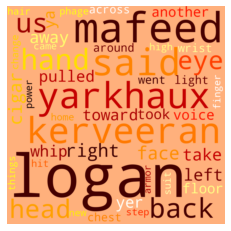

Chapter 2.txt


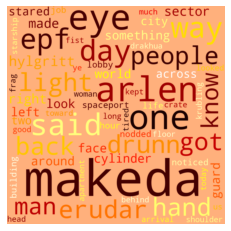

Chapter 3.txt


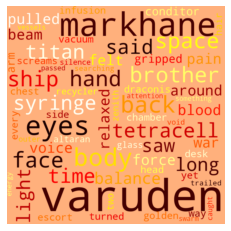

Chapter 4.txt


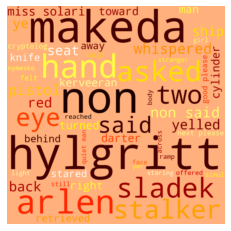

Chapter 5.txt


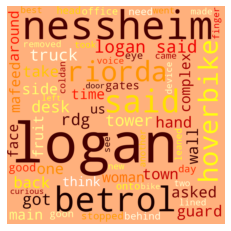

Chapter 6.txt


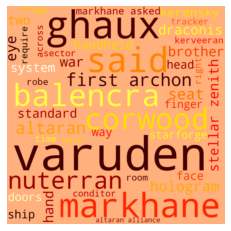

First Paragon.txt


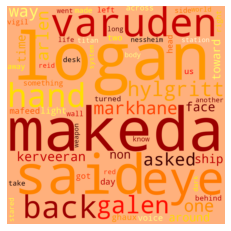

Prologue.txt


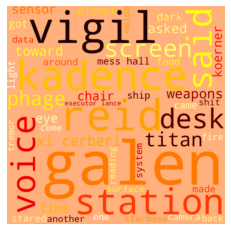

In [73]:
for i in range (len(df4)):
    print(df4["Chapters"].loc[i])
    wordcloud_gen(df4['Content'].loc[i],df4['Chapters'].loc[i])

## Vocabulary

In [21]:
def unique_words(text):
    a = text.split()
    return len(set(a))

unique_list = []
no_of_words = []
for i in range(len(df2)):
    length = unique_words(df2["Content"].loc[i])
    unique_list.append(length)
    words = len(df2["Content"].loc[i].split())
    no_of_words.append(words)
unique_list

[860, 1374, 876, 928, 1269, 978, 4403, 1072]

In [22]:
no_of_words

[2064, 4174, 1986, 2538, 3289, 2463, 21307, 2991]

In [23]:
df8 = pd.DataFrame(list(zip(chap, unique_list, no_of_words)),
                   columns=['Chapter', 'Unique Words','Total Words'])
df8["Ratio_TotalbyUnique"] = df8["Total Words"] / df8["Unique Words"]
df8.sort_index().round(2)

,Chapter,Unique Words,Total Words,Ratio_TotalbyUnique
0,Chapter 1.txt,860,2064,2.40
1,Chapter 2.txt,1374,4174,3.04
2,Chapter 3.txt,876,1986,2.27
3,Chapter 4.txt,928,2538,2.73
4,Chapter 5.txt,1269,3289,2.59
5,Chapter 6.txt,978,2463,2.52
6,First Paragon.txt,4403,21307,4.84
7,Prologue.txt,1072,2991,2.79


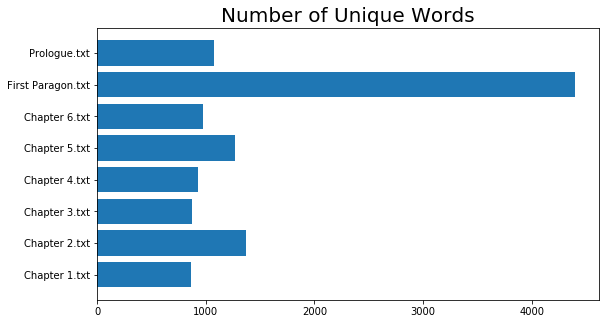

In [74]:
import numpy as np

plt.figure(figsize=(9,5))
plt.barh(df8["Chapter"], df8['Unique Words'])
plt.title('Number of Unique Words',fontsize=20)
#plt.tick_params(axis ='x', color = 'white')
#plt.tick_params(axis ='y', color = 'white')
#plt.savefig('Number of Unique Words.png')

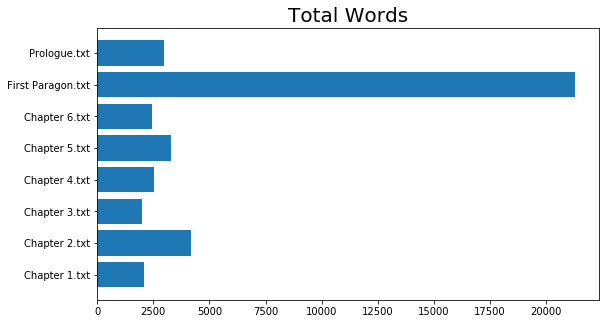

In [75]:
plt.figure(figsize=(9,5))
plt.barh(df8["Chapter"], df8['Total Words'])
plt.title('Total Words',fontsize=20)
#plt.savefig('Total Words.png')

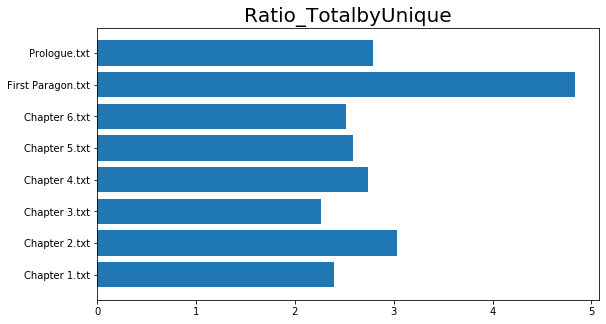

In [76]:
plt.figure(figsize=(9,5))
plt.barh(df8["Chapter"], df8['Ratio_TotalbyUnique'])
plt.title('Ratio_TotalbyUnique',fontsize=20)
#plt.savefig('Ratio_TotalbyUnique.png')

## Sentiment Analysis

In [27]:
df4

,Chapters,Content
0,Chapter 1.txt,remember earth lie grassy knoll listen glidecraft harvesters heading home day track mud lounge dad would wag finger us mom would lecture make us clean dinner huddle watch vid four us couch family ...
1,Chapter 2.txt,makeda drakhua system drakhua ii altaran alliance mining colony raindrop splashed makeda forehead kept eyes shut letting cold droplet travel temple another drop struck bridge nose reluctantly open...
2,Chapter 3.txt,varuden draconis system outer space varuden kerensky floated void silence emptiness space relaxed senses constant exertion resist vacuum invigorated pulled exposed body searching weakness long gol...
3,Chapter 4.txt,makeda ii hell eh hylgritt asked stepping stranger personal space right hand hovering knife ride dear girl man replied peculiar accent voice deep emotionless short robust wearing black tight fitte...
4,Chapter 5.txt,logan ii best jace made difference came together pushed one like think mattered seraphim cause prophecies great path shit blind scared rest bigger say take us gone hell already peering gates sun g...
5,Chapter 6.txt,varuden ii samael edge ii flagship preliator stellar zenith military caste five kilometers length beautiful massive nearly twice size titan horrific vessels right gleaming warship unique destructi...
6,First Paragon.txt,first paragon book ascendant saga cristian scubli characters events publication clearly public domain fictitious resemblance real persons living dead purely coincidental copyright cristian scubli ...
7,Prologue.txt,prologue xi cerberi system low orbit xi cerberi prime galen kiani hunched stared unshaven face cracked mirror blue neon spotlight favors mattered readying new day emerged cramped quarters aboard s...


In [28]:
from textblob import TextBlob as tb

pol = lambda x: tb(x).sentiment.polarity
sub = lambda x: tb(x).sentiment.subjectivity

df4['Polarity'] = df4['Content'].apply(pol)
df4['Subjectivity'] = df4['Content'].apply(sub)
df4

,Chapters,Content,Polarity,Subjectivity
0,Chapter 1.txt,remember earth lie grassy knoll listen glidecraft harvesters heading home day track mud lounge dad would wag finger us mom would lecture make us clean dinner huddle watch vid four us couch family ...,0.077535,0.457387
1,Chapter 2.txt,makeda drakhua system drakhua ii altaran alliance mining colony raindrop splashed makeda forehead kept eyes shut letting cold droplet travel temple another drop struck bridge nose reluctantly open...,0.020966,0.445823
2,Chapter 3.txt,varuden draconis system outer space varuden kerensky floated void silence emptiness space relaxed senses constant exertion resist vacuum invigorated pulled exposed body searching weakness long gol...,0.047940,0.452609
3,Chapter 4.txt,makeda ii hell eh hylgritt asked stepping stranger personal space right hand hovering knife ride dear girl man replied peculiar accent voice deep emotionless short robust wearing black tight fitte...,0.053785,0.437539
4,Chapter 5.txt,logan ii best jace made difference came together pushed one like think mattered seraphim cause prophecies great path shit blind scared rest bigger say take us gone hell already peering gates sun g...,0.056308,0.462677
5,Chapter 6.txt,varuden ii samael edge ii flagship preliator stellar zenith military caste five kilometers length beautiful massive nearly twice size titan horrific vessels right gleaming warship unique destructi...,0.081435,0.434232
6,First Paragon.txt,first paragon book ascendant saga cristian scubli characters events publication clearly public domain fictitious resemblance real persons living dead purely coincidental copyright cristian scubli ...,0.043374,0.449329
7,Prologue.txt,prologue xi cerberi system low orbit xi cerberi prime galen kiani hunched stared unshaven face cracked mirror blue neon spotlight favors mattered readying new day emerged cramped quarters aboard s...,0.001327,0.448041


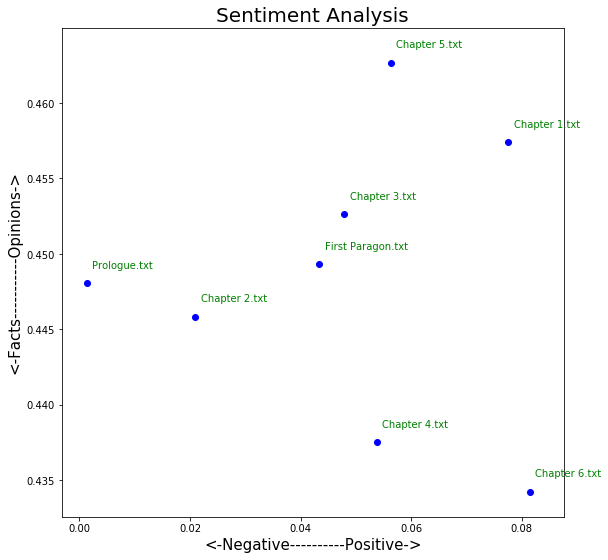

In [77]:
plt.figure(figsize=(9,9))
for i, j in enumerate(df4.index):
    x = df4["Polarity"].loc[j]
    y = df4["Subjectivity"].loc[j]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.001, y+0.001, df4['Chapters'][i], color= 'green')
   #plt.xlim(-0.01, 0.12)

plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel("<-Negative----------Positive->", fontsize=15)
plt.ylabel("<-Facts-----------Opinions->", fontsize=15)
#plt.savefig('Sentiment Analysis.png')
plt.show()

## Sentiment Over Time


In [30]:
import math

def split_text(text, n):
    #calculate length of text
    length = len (text)
    #Calculate size of each chunk
    size = math.floor(length/n)
    #Calculate the Starting point of each chunk
    start = np.arange(0,length, size)
    
    #pull equally sized text and put it into list
    split_list=[]
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [31]:
list_pieces = []
for t in df4["Content"]:
    split = split_text(t,10)
    list_pieces.append(split)

print(len(list_pieces))
print(len (list_pieces[1]))

8
10


In [32]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(tb(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
polarity_transcript[1]

[-0.034986772486772504,
 0.01781609195402299,
 0.02267316017316018,
 0.10207875457875458,
 0.07228835978835979,
 0.04533333333333332,
 0.041858678955453144,
 0.04960565476190475,
 -0.10738916256157635,
 0.009031385281385284]

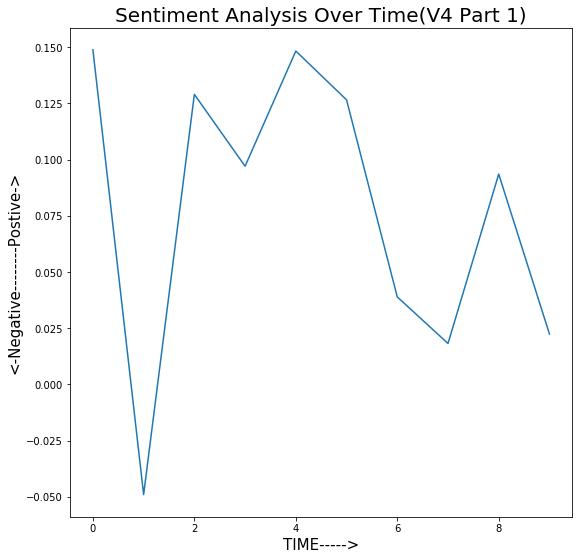

In [78]:
plt.figure(figsize=(9,9))
plt.plot(polarity_transcript[0])
plt.title('Sentiment Analysis Over Time(V4 Part 1)', fontsize=20)
plt.ylabel("<-Negative--------Postive->", fontsize=15)
plt.xlabel("TIME----->", fontsize=15)
#plt.savefig('Sentiment Analysis Over Time(V4 Part 1).png')
plt.show()

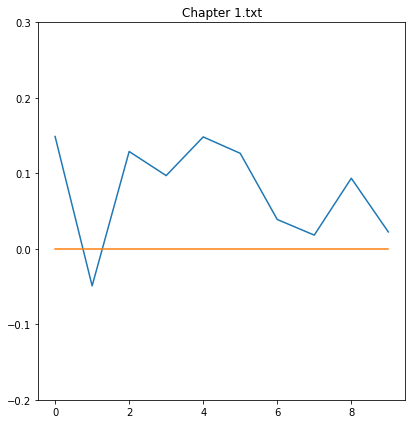

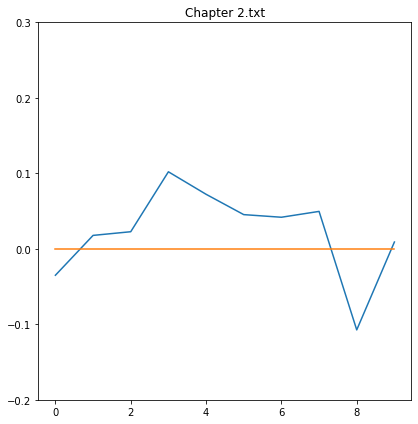

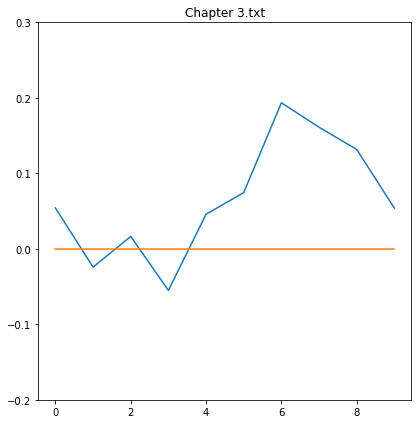

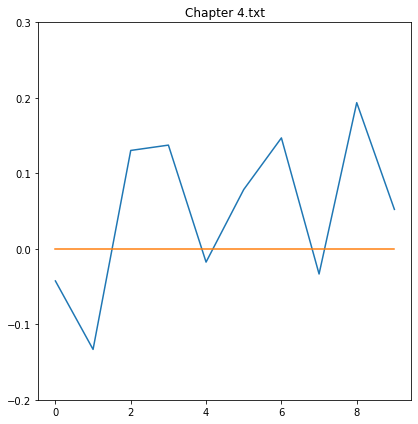

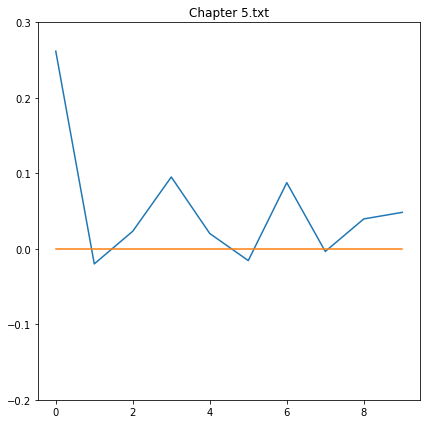

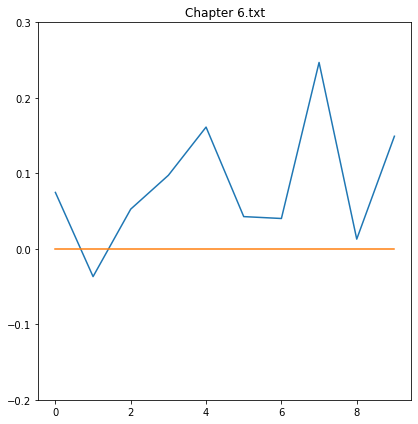

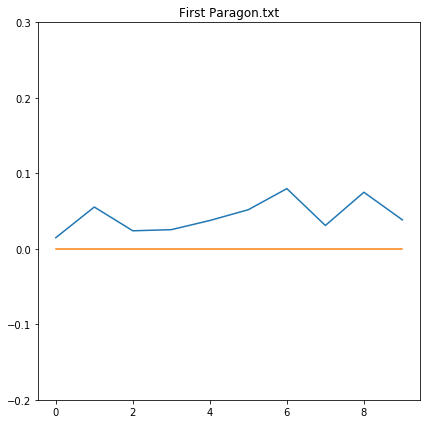

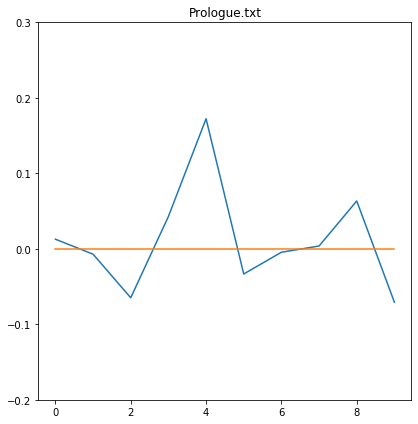

In [79]:
for index, comedian in enumerate(df4.index):    
    plt.figure(figsize=(6,6))
    #plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(df4['Chapters'][index])
    plt.tight_layout()
    plt.ylim(ymin=-.2, ymax=.3)
    #plt.savefig('Sentiment Analysis Over Time ({}).png'.format(df4['Chapters'][index]))
    
plt.show()